<a href="https://colab.research.google.com/github/devrihartle/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/LS_DS_Unit1_Sprint3_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 1 Sprint 3 Challenge - Linear Algebra


## Welcome to the final sprint challenge of Unit 1!

In this challenge, we're going to explore two different datasets where you can demonstrate your skills with fitting linear regression models and linear algebra.

Good luck!

### Tasks

* Load and explore the first dataset
* Fit a simple linear regression model to one independent variable
* Fit a regression model to two independent variables
* Interpret R-squared and an adjusted R-squared values
* Load word vector data and explore
* Calculate the cosine similarity between the vectors

---

### Data: Information

This dataset is a record of seven common different fish species in fish market sales. With this dataset, we can practice fitting linear regression models. More information can be found at the link below.

* [Kaggle: Fish Market Dataset](https://www.kaggle.com/aungpyaeap/fish-market)

## 1) Load the data

* From the URL provided, load the CSV file as a DataFrame - arguments: use the default parameters for `pandas.read_csv()`
* The shape of your DataFrame should be `(159, 7)`

In [ ]:
# Load the data

# URL provided
url = "https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Fish/Fish.csv"

### your code here ###
import pandas as pd

df = pd.read_csv(url)
df.shape


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

## 2) Explore, Visualize, and Clean

Now you want to take a look at the dataset, figure out what variable types the columns contain, identify missing values, and possibly look for outliers.

**Your tasks**

* Use describe() and info() to learn about any missing values, the data types, and descriptive statistics for each numeric value

*Hint: look at the minimum values for each column - would it make sense to remove rows that have a `0` in any of the columns?*

In [ ]:
### your code here ###
df.describe()
#df.info()
df=df[df!=0].dropna()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## 3) Visualize and Identify the Target

Now that you know more about the data, we need to identify the *target* or response variable: what are we trying to predict? You can create a visualization to look at all of the numeric variables.

**Your tasks**

* Use the seaborn library `sns.pairplot()` function to create your visualization (use the starter code)
* Using the pairplot, identify two variables that you will use to fit a linear regression model

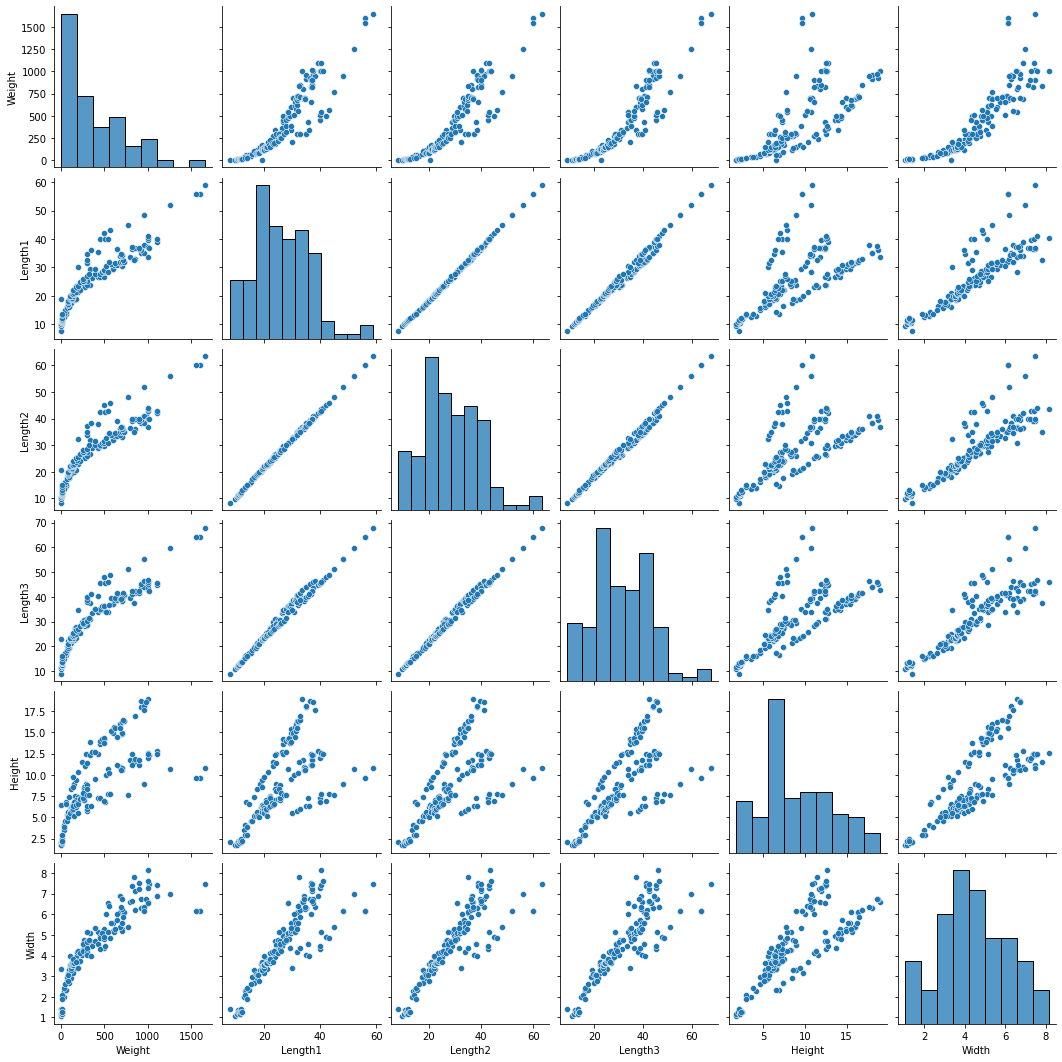

In [ ]:
# Import seaborn
import seaborn as sns

# Use sns.pairplot(data) where data is the name of your DataFrame
to_plot = df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
sns.pairplot(to_plot)



## your code here ##

### Short answer:

* What are the two variables you will use to fit a linear regression model and why did you choose them?
We are trying to predict weight. I am choosing weight as my target variable and length 1 as my independent variable. 


## 4) Create a scatter plot with a best-fit line

Before we fit the linear regression model, we'll check how well a line fits our two variables. Because you have some choices for which independent variable to select, we're going to complete the rest of our analysis using `Width` as the independent variable and `Weight` as the dependent (target) variable.

**Your tasks:**

* Create a scatter plot using seaborn with `Width` and `Weight`
* Use the sns.lmplot() and specify a confidence interval of 0.95
* Answer the questions about your plot.


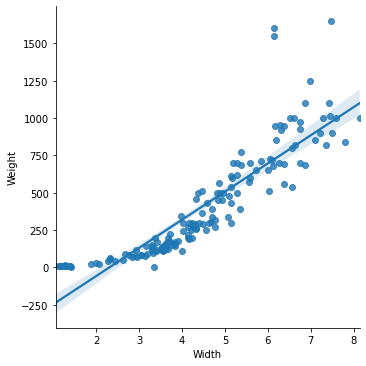

In [ ]:
## your code here ##
import seaborn as sns
sns.lmplot(x="Width", y="Weight", data=df, ci=95)

### Short answer:

1. Does it make sense to fit a linear model to these two variables? In otherwords, are there any problems with this data like extreme outliers, non-linearity, etc. 
It does make sense to fit a linear model for the most part, but there are outliers. 
2. Over what range of your independent variable does the model not fit the data well?
it does not fit well between 0-2 and 6-8

## 5) Fit a linear regression model

Now it's time to fit the linear regression model! We have two variables (`width` and `weight`).

**Your tasks:**

*  Use the `statsmodels.formula.api` library and import the `ols` method
*  Fit a **single variable linear regression model** and print out the model summary
*  Answer the questions about your resulting model parameters

In [ ]:
## your code here ##
from statsmodels.formula.api import ols

model = ols('Weight ~ Width', data = df).fit()

model.params
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     576.3
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           2.04e-54
Time:                        17:15:32   Log-Likelihood:                -1037.6
No. Observations:                 159   AIC:                             2079.
Df Residuals:                     157   BIC:                             2085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -433.2589     37.063    -11.690      0.0

### Short Answer:
1. Is the correlation between your variables positive or negative? **Positive**
2. How would you write the confidence interval for your slope coefficient? **We are 95% confident that the true slope of the relationship between Width and Weight is between 172.760 and 203.738 years**
3. State the null hypothesis to test for a statistically significant relationship between your two variables.
Ho:  𝛽1  = 0
There is no relationship between the two variables. 
4. Using the P value from your model, do you **reject** or **fail to reject** the null hypothesis?
**Reject the null hypothesis, we can assume that there is a relationship between width and weight. **

## 6) Fit a multiple predictor linear regression model

For this next task, we'll add in an additional independent or predictor variable. Let's look back at the pairplot and choose another variable - we'll use `Length1`.

Now fit linear regression model using two predictor variables: `Width` and `Length1`.

**Your tasks:**

* Select an additional predictor variable
* Fit a model with both variables and print out the model summary
* Answer the questions about your model

In [ ]:
## your code here ##
from statsmodels.formula.api import ols

model = ols('Weight ~ Width + Length1', data = df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     536.3
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           1.23e-70
Time:                        17:26:36   Log-Likelihood:                -996.03
No. Observations:                 159   AIC:                             1998.
Df Residuals:                     156   BIC:                             2007.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -508.2614     29.536    -17.208      0.0

### Short answer:

1. What percentage of the variance is explained by your first variable (when you only had one predictor variable)? 79%
2. How does the adjusted R-squared value change when a second pedictor variable is added? It will only increase if the new variable is an accurate predictor of the target. In this case it seems like Length1 is a good variable to add to the model when explaining the variance. 

## Part 2: Vectors and cosine similarity

In this part of the challenge, we're going to look at how similar two vectors are. Remember, we can calculate the **cosine similarity** between two vectors by using this equation:

$$\cos \theta= \frac{\mathbf {A} \cdot \mathbf {B} }{\left\|\mathbf {A} \right\|\left\|\mathbf {B} \right\|}$$

$\qquad$

The numerator is the dot product of the vectors $\mathbf {A}$ and $\mathbf {B}$

The denominator is the norm of $\mathbf {A}$ times the norm of $\mathbf {B}$

### Three documents, two authors

For this task, you will calculate the cosine similarity between three vectors. But here's the interesting part: each vector represents a "chunk" of text from a novel (a few chaptes of text). This text was cleaned to remove non-alphanumeric characters and numbers and then each document was transformed into a vector representation as described below. 

### Document vectors

In the dataset you are going to load below, each row represents a word that occurs in at least one of the documents. So all the rows are all the words that are in our three documents.

Each column represents a document (doc0, doc1, doc2). Now the fun part: the value in each cell is how frequently that word (row) occurs in that document (term-frequency) divided by how many documents that words appears in (document-frequency).

`cell value = term_frequency / document_frequency`

### Using cosine similarity

You will be using cosine similarity to compare each document vector to the others. Remember that there are three documents, but two authors. Your task is to use the cosine similarity calculations to determine which two document vectors are most similar (written by the same author).

**Your tasks:**

* Load in the csv file that contains the document vectors (this is coded for you - just run the cell)
* Look at the DataFrame you just loaded in any way that helps you understand the format, what's included in the data, the shape of the DataFrame, etc.
* Calculate the cosine similarity for **three pairs of vectors**
  * doc0-doc1
  * doc0-doc2
  * doc1-doc2

* Print out the results so you can refer to them
* Answer the questions after you have completed the cosine similarity calculations


In [ ]:
# Imports (import pandas if you haven't)

# Load the data - DON'T DELETE THIS CELL
url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_4/unit1_nlp/text_vectors.csv'
text = pd.read_csv(url)


In [ ]:
## Explore the data

## your code here ##
text.head()



,Unnamed: 0,word,doc0,doc1,doc2
0,0,abhorrent,0.0,0.000000,0.008915
1,1,ability,0.0,0.021156,0.000000
2,2,abject,0.0,0.000000,0.008915
3,3,able,0.0,0.000000,0.017829
4,4,abode,0.0,0.042313,0.000000


In [ ]:
## Calculate the cosine similarity

# Use these imports for you cosine calculations (DON'T DELETE)
from numpy import dot
from numpy.linalg import norm

## your code here ##
from numpy import dot
from numpy.linalg import norm
doc0_doc1 = dot(text['doc0'], text['doc1'])/(norm(text['doc0'])*norm(text['doc1']))
print(doc0_doc1)
doc0_doc2 = dot(text['doc0'], text['doc2'])/(norm(text['doc0'])*norm(text['doc2']))
print(doc0_doc2)
doc1_doc2 = dot(text['doc1'], text['doc2'])/(norm(text['doc1'])*norm(text['doc2']))
print(doc1_doc2)

0.1296380132160888
0.09904444112880154
0.32171252792371724


## Short answer

1. Using your cosine similarity calculations, which two documents are most similar? Document number 1 and document number 2 are the most similar (since they are from the same book) and Document number 0 and number 1 are the second most similar.
2. If doc1 and doc2 were written by the same author, are your cosine similarity calculations consistent with this statement? Yes, but this is a weird question since they are written by the same author. 
3. What process would we need to follow to add an additional document column? In other words, why can't we just stick another column with (term-frequency/document-frequency) values onto our current DataFrame `text`?
You would also need to calculate the frequency of the new document words in the other existing frequency columns. 

**Additional Information about the texts used in this analysis:**

You can find the raw text [here](https://github.com/LambdaSchool/data-science-practice-datasets/tree/main/unit_4/unit1_nlp). Dcoument 0 (doc0) is chapters 1-3 from "Pride and Predjudice" by Jane Austen. Document 1 (doc1) is chapters 1- 4 from "Frankenstein" by Mary Shelley. Document 2 is also from "Frankenstein", chapters 11-14.